In [1]:
import cbs
from mapf import *
# from ercbs import *
from regional_mapf import *
from matplotlib import pyplot as plt

(72, 72)


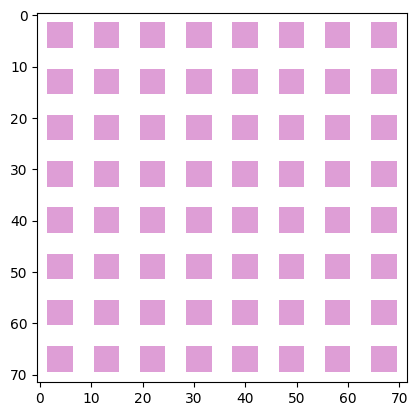

In [2]:
nrows = 8
ncols = 8
env = ColumnLatticeEnvironment(nrows, ncols, 5, 5, 2, 2, 1, 1)
print(env.gridworld.size)
fig, ax = plt.subplots()
draw_environment(ax,env,{},{})

In [7]:
N_agents = 50
partial_paths, region_paths, final_goals = random_problem(N_agents, env, path_cutoff = 8)

In [8]:
omega = 1.05
node = rcbs_init(env, partial_paths, region_paths, final_goals)
update_rcbsnode(env, node, [R for R in node.cbs_nodes], omega, 30., False)
result = rcbs(env, node, omega, maxtime = 240, verbose=True)

popped from FOCAL
conflict count: 0
rcbs transferring agents to next region
max of remaining trips 13, updating node...
popped from FOCAL
conflict count: 0
rcbs transferring agents to next region
max of remaining trips 12, updating node...
popped from FOCAL
conflict count: 0
rcbs transferring agents to next region
max of remaining trips 11, updating node...
popped from FOCAL
conflict count: 1
Applying constraint t = 23, p1 = (35, 19), p2 = (35, 18) to 36
rcbs branched
transferring 2 to (3, 1)
Applying constraint t = 23, p1 = (35, 17), p2 = (35, 18) to 2
focal node cost 1465, best lower bound in OPEN 2325
popped from FOCAL
conflict count: 0
rcbs transferring agents to next region
max of remaining trips 10, updating node...
popped from FOCAL
conflict count: 0
rcbs transferring agents to next region
max of remaining trips 9, updating node...
popped from FOCAL
conflict count: 1
Applying constraint t = 31, p1 = (63, 54), p2 = (62, 54) to 31
rcbs branched
transferring 10 to (6, 6)
Applying c

In [5]:
print(result[0].cost)
print(result[0].lower_bound)
print(result[0].lower_bound*omega)

2277
2226
2337.3


77


KeyboardInterrupt: 

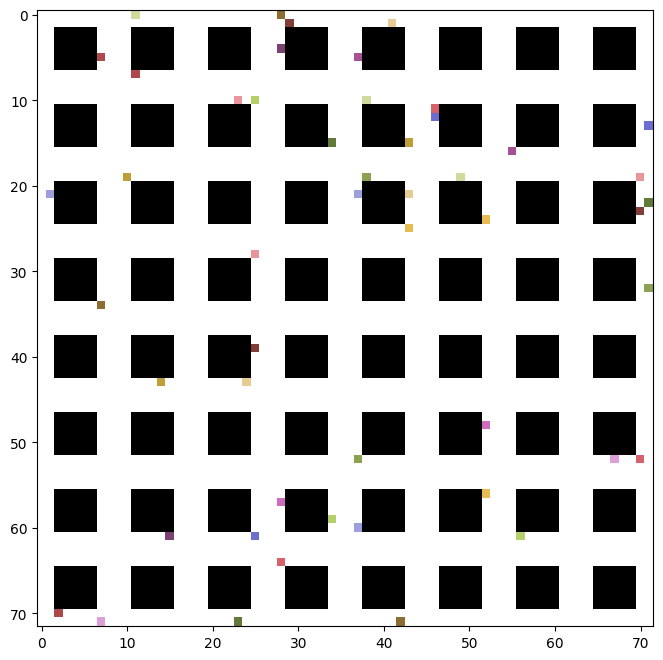

In [6]:
node = result[0]
solution = node.make_solution()
animation = MAPFAnimation(env, solution)
animation.animate().save('foo.gif')